In [2]:
import pandas as pd
data=pd.read_csv("/content/SImm.csv")
print(data)

                           Location         Type Bedrooms Bathrooms  \
0                Amelkis, Marrakech        Villa        4         4   
1                Maarif, Casablanca       Studio        1         0   
2     Argan Golf Ressort, Marrakech        Villa        4         4   
3     Argan Golf Ressort, Marrakech        Villa        4         6   
4                Chrifia, Marrakech        Villa        5         6   
...                             ...          ...      ...       ...   
4673               Hay Salam, Oujda       Maison        7         3   
4674                    Iris, Oujda       Maison        7         3   
4675         Bd Jaych Tahrir, Oujda       Maison        7         3   
4676                    Iris, Oujda       Maison        6         2   
4677          Hay Mohammadi, Agadir  Appartement      {0}        82   

      Area Size     Price  
0           440  16500000  
1            55   1270000  
2           450   7300000  
3           450   6500000  
4      

In [3]:
data.isna().sum()

Location      0
Type          0
Bedrooms      0
Bathrooms    28
Area Size     0
Price         0
dtype: int64

In [13]:
data["Bathrooms"]=data["Bathrooms"].fillna(0)
data["Bathrooms"]=data["Bathrooms"].astype(str)
print(data)

      Location  Type  Bedrooms Bathrooms  Area Size  Price
0           29    10        18         4        440    843
1          240     7         1         0         55    294
2           36    10        18         4        450    712
3           36    10        18         6        450    693
4          116    10        21         6        450    651
...        ...   ...       ...       ...        ...    ...
4673       181     4        25         3        120    279
4674       202     4        25         3        120    197
4675        56     4        25         3        120    303
4676       202     4        23         2         90    234
4677       175     0        29        82         82    161

[4678 rows x 6 columns]


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Type"]=le.fit_transform(data["Type"])
data["Location"]=le.fit_transform(data["Location"])
data["Bedrooms"]=le.fit_transform(data["Bedrooms"])
data["Bathrooms"]=le.fit_transform(data["Bathrooms"])
print(data)

      Location  Type  Bedrooms  Bathrooms  Area Size  Price
0           29    10        18         74        440    843
1          240     7         1          0         55    294
2           36    10        18         74        450    712
3           36    10        18        102        450    693
4          116    10        21        102        450    651
...        ...   ...       ...        ...        ...    ...
4673       181     4        25         60        120    279
4674       202     4        25         60        120    197
4675        56     4        25         60        120    303
4676       202     4        23         42         90    234
4677       175     0        29        129         82    161

[4678 rows x 6 columns]


In [15]:
x=data.drop("Price",axis=1)
y=data["Price"]

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

      Location  Type  Bedrooms  Bathrooms  Area Size
2483       394     0        10          1        104
1768        25     0        10         42        124
4440       365     8         0          0        120
2870       326     0        18         67        337
4631       386     0        29        120         75
...        ...   ...       ...        ...        ...
1346       443    10        25        113        700
1824       325     0        10         42        100
4026        86     0        14         42         89
2690       122     0        14         42        110
2183       250     0        10         42        111

[4584 rows x 5 columns]
2483    370
1768    194
4440     68
2870    627
4631    149
       ... 
1346    660
1824    424
4026    137
2690    173
2183    523
Name: Price, Length: 4584, dtype: int64


In [17]:
from sklearn.linear_model import LinearRegression
br=LinearRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

In [21]:
c=br.predict([[394,1,5,5,450]])
print(c)

[358.32246688]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<BarContainer object of 4678 artists>

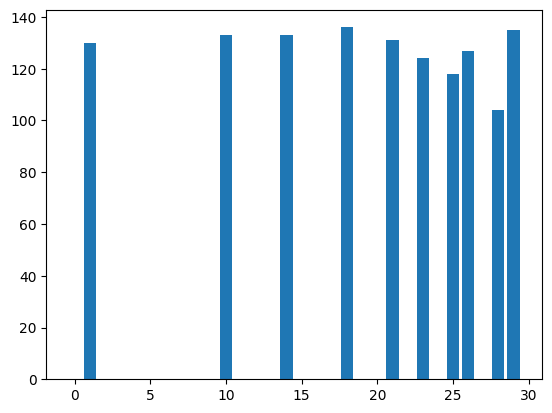

In [22]:
from matplotlib import pyplot as plt
plt.bar(data["Bedrooms"],data["Bathrooms"])